In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import Data

In [108]:
Telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [109]:
!ls

Data Analysis.ipynb                  Telco-Customer-Churn.csv
Modeling.ipynb                       WA_Fn-UseC_-Telco-Customer-Churn.csv


In [110]:
Telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### **Checking and Correcting Types**

In [228]:
Telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [111]:
Telco_df.TotalCharges = pd.to_numeric(Telco_df.TotalCharges, errors='coerce')

In [112]:
Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].apply(str)
Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].str.replace('1', 'Yes', regex=True)
Telco_df['SeniorCitizen'] = Telco_df['SeniorCitizen'].str.replace('0', 'No', regex=True)

In [113]:
Telco_df=Telco_df.drop(columns = 'customerID')

# Unique values

In [114]:
print ("\nMissing values :  ", Telco_df.isnull().sum().values.sum())
print ("\nUnique values : \n", Telco_df.nunique())


Missing values :   11

Unique values : 
 gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64


In [115]:
Telco_df.dropna(inplace = True)

In [116]:
Telco_df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [117]:
Telco_df.Dependents.unique()

array(['No', 'Yes'], dtype=object)

In [118]:
Telco_df.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

In [119]:
Telco_df.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [120]:
Telco_df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [121]:
Telco_df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [122]:
Telco_df.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [123]:
Telco_df.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [124]:
Telco_df.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [125]:
Telco_df.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [126]:
Telco_df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [127]:
Telco_df.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

In [128]:
Telco_df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [129]:
Telco_df.Churn.unique()

array(['No', 'Yes'], dtype=object)

# Simple Data Analysis

- We notice that from all their clients, they populate they strongly populate the first month and the last month.
- When we break down the Churn variable, we see that those that DO CHURN do so in the first few months. There is a decrease in those that churn months later, which makes sense because those who don't want to be with the company would do it early on.
- Currently, when we look at each month, the first month and last month are the highest with population.

#### Explore more: What percent of those in the first two months churn. OR do it by month comparison!!!


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a173384a8>,
      dtype=object)

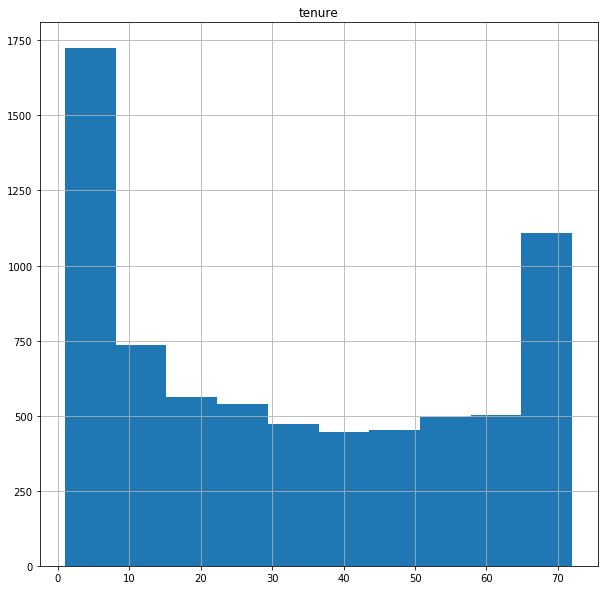

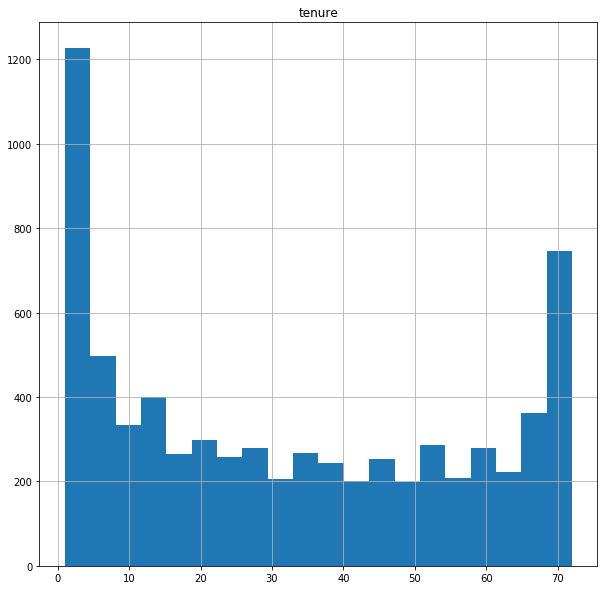

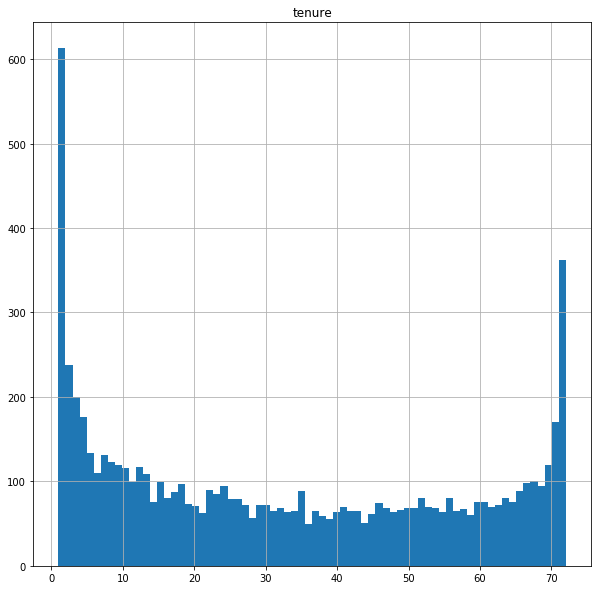

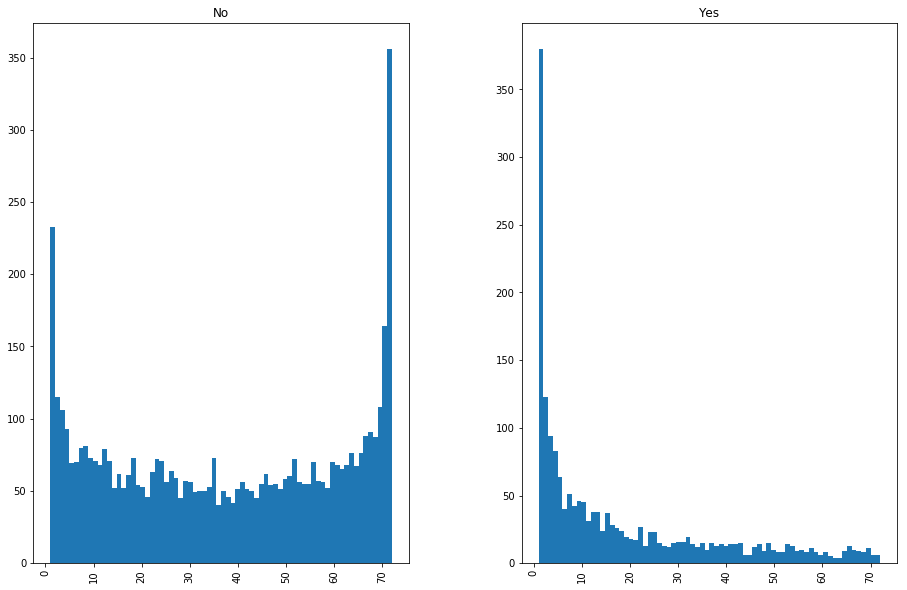

In [116]:
Telco_df.hist('tenure', bins = 10, figsize=(10,10))
Telco_df.hist('tenure', bins = 20, figsize=(10,10))
Telco_df.hist('tenure', bins = 72, figsize=(10,10))
Telco_df.hist('tenure', bins = 72, by = 'Churn', figsize=(15,10))


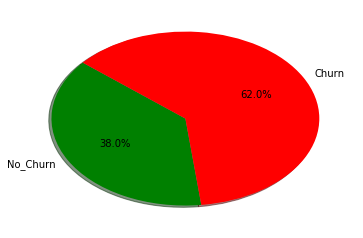

In [117]:
for month in [0]:
    Month_df = Telco_df.loc[Telco_df['tenure'].isin([month+1])]
    Month_df.groupby(['Churn'], sort=False).size()
    labels = ['No_Churn', 'Churn']
    sizes = [Month_df.groupby(['Churn'], sort=False).size()[0], Month_df.groupby(['Churn'], sort=False).size()[1]]
    colors = ['green', 'red']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

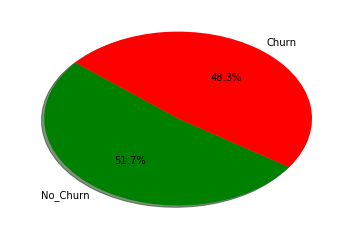

In [118]:
for month in [1]:
    Month_df = Telco_df.loc[Telco_df['tenure'].isin([month+1])]
    Month_df.groupby(['Churn'], sort=False).size()
    labels = ['No_Churn', 'Churn']
    sizes = [Month_df.groupby(['Churn'], sort=False).size()[0], Month_df.groupby(['Churn'], sort=False).size()[1]]
    colors = ['green', 'red']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)


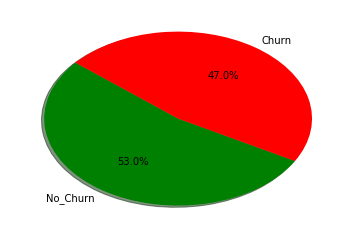

In [119]:
for month in [2]:
    Month_df = Telco_df.loc[Telco_df['tenure'].isin([month+1])]
    Month_df.groupby(['Churn'], sort=False).size()
    labels = ['No_Churn', 'Churn']
    sizes = [Month_df.groupby(['Churn'], sort=False).size()[0], Month_df.groupby(['Churn'], sort=False).size()[1]]
    colors = ['green', 'red']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

#### Simple histogram of the data:

##### Notes:

Important:
- Churn ratio from Churn is ~1/3
- There are a large amount of people with month-to-month contract and a fair split in the 1 and 2 year contract


Characteristics of Telco customers from this data:
- Dependents ratio are roughly 2.5 difference
- PhoneService ratio is very different
- SeniorCitizen has 1/6 ratio to non-senio citizen
- Partner has 1/2 ratio
- PaperlessBilling seem roughly balance

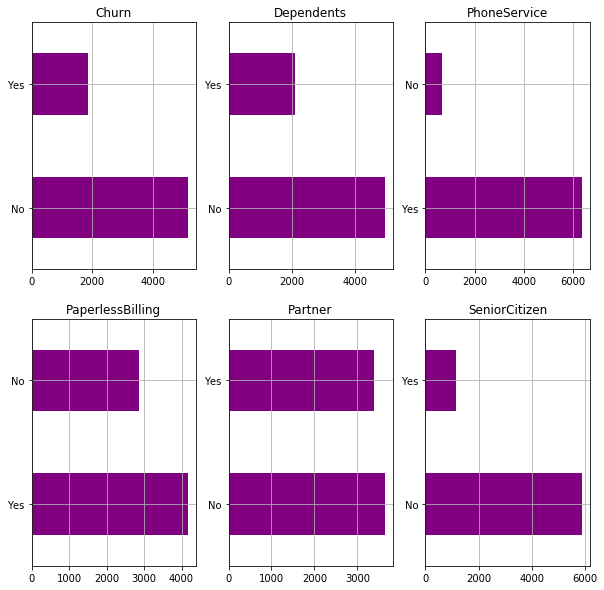

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

Telco_df['Churn'].value_counts().plot(kind = 'barh', grid = True, color= "purple", ax=axes[0,0])
Telco_df['Dependents'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[0,1])
Telco_df['PhoneService'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[0,2])
Telco_df['PaperlessBilling'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,0])
Telco_df['Partner'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,1])
Telco_df['SeniorCitizen'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,2])

axes[0,0].title.set_text('Churn')
axes[0,1].title.set_text('Dependents')
axes[0,2].title.set_text('PhoneService')
axes[1,0].title.set_text('PaperlessBilling')
axes[1,1].title.set_text('Partner')
axes[1,2].title.set_text('SeniorCitizen')

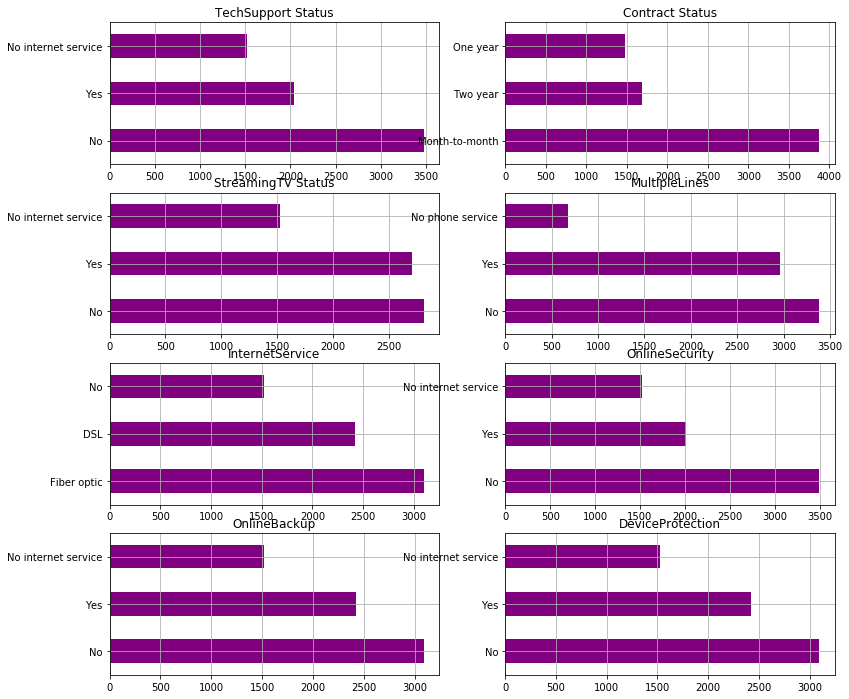

In [121]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13,12))

Telco_df['TechSupport'].value_counts().plot(kind = 'barh', grid = True, color= "purple", ax=axes[0,0])
Telco_df['Contract'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[0,1])
Telco_df['StreamingTV'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,0])
Telco_df['MultipleLines'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[1,1])
Telco_df['InternetService'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[2,0])
Telco_df['OnlineSecurity'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[2,1])
Telco_df['OnlineBackup'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[3,0])
Telco_df['DeviceProtection'].value_counts().plot(kind = 'barh', grid = True, color= "purple",ax=axes[3,1])


axes[0,0].title.set_text('TechSupport Status')
axes[0,1].title.set_text('Contract Status')
axes[1,0].title.set_text('StreamingTV Status')
axes[1,1].title.set_text('MultipleLines')
axes[2,0].title.set_text('InternetService')
axes[2,1].title.set_text('OnlineSecurity')
axes[3,0].title.set_text('OnlineBackup')
axes[3,1].title.set_text('DeviceProtection')



# Complex Data Analysis -
------------
Pairplot 1: 
How does distribution play out when broken into Churn?

Highlights:
- Those that churn generally had the highest charges
        - Bin the total charges by churn and see how much each section fell in that pecentile
- The Monthly charges vs Total charges however disagrees with the statement above. It tells the opposite.
------------

Pairplot 2:
How does distrbution play out when broken into Gender?

- 
- 

Highlights:

- 
- 
------------

Pairplot 3:
How does distribution play out when broken into SeniorCitizen?

Highlights:

------------

Violin 1:
Churn on categorical variables

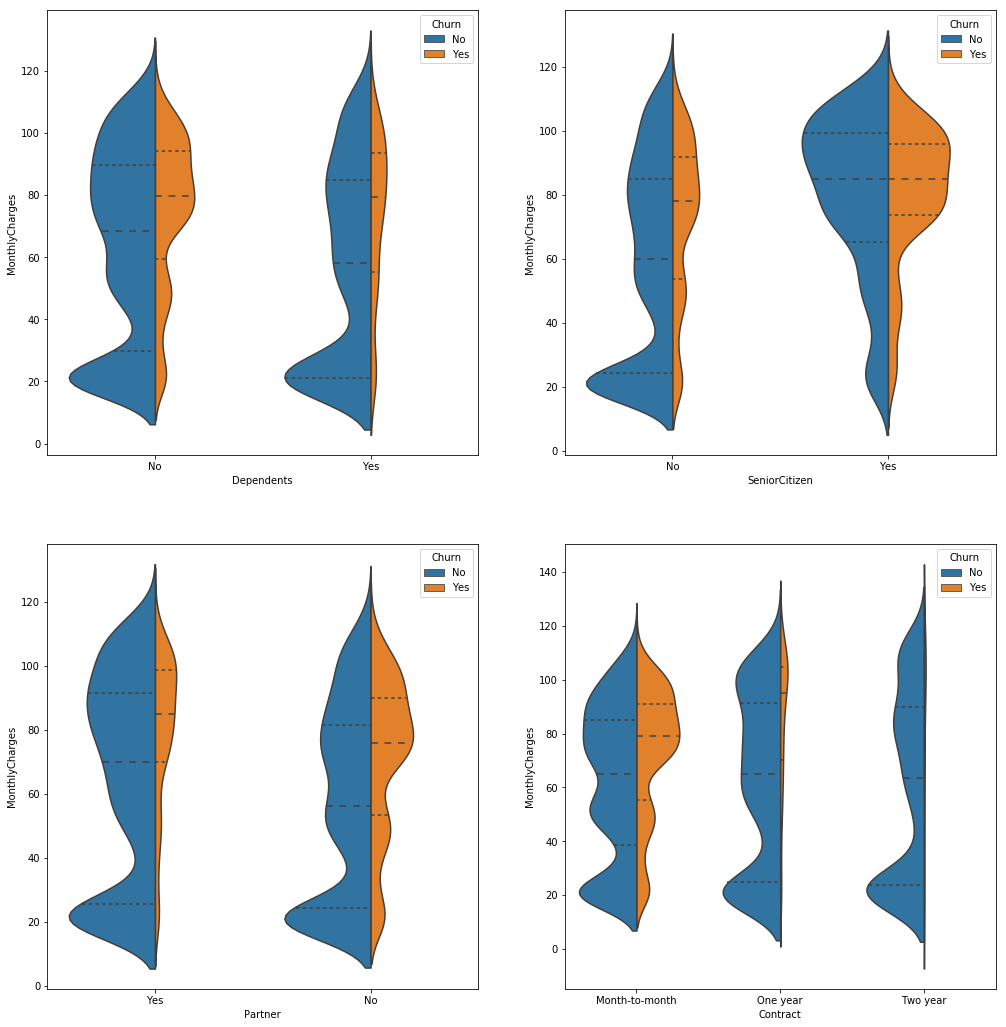

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,18))

sns.violinplot(x="Dependents", y="MonthlyCharges",hue="Churn", scale="count", inner="quartile", data=Telco_df, ax=axes[0,0], split=True)
sns.violinplot(x="SeniorCitizen", y="MonthlyCharges",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[0,1], split=True)
sns.violinplot(x="Partner", y="MonthlyCharges",hue="Churn", scale="count", inner="quartile", data=Telco_df, ax=axes[1,0], split=True)
sns.violinplot(x="Contract", y="MonthlyCharges",hue="Churn", scale="count", inner="quartile", data=Telco_df, ax=axes[1,1], split=True)

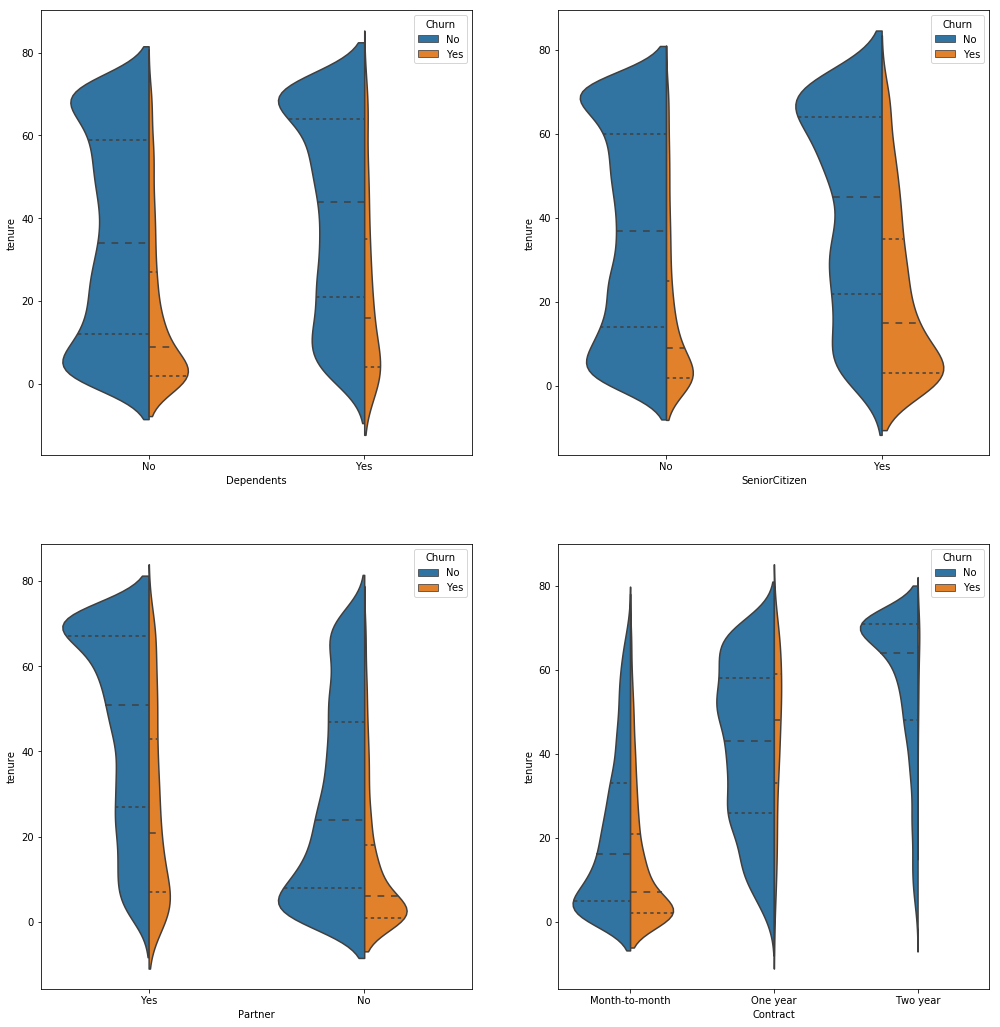

In [123]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17,18))

sns.violinplot(x="Dependents", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[0,0], split=True)
sns.violinplot(x="SeniorCitizen", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[0,1], split=True)
sns.violinplot(x="Partner", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[1,0], split=True)
sns.violinplot(x="Contract", y="tenure",hue="Churn",scale="count", inner="quartile", data=Telco_df, ax=axes[1,1], split=True)

In [244]:
?sns.pairplot

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


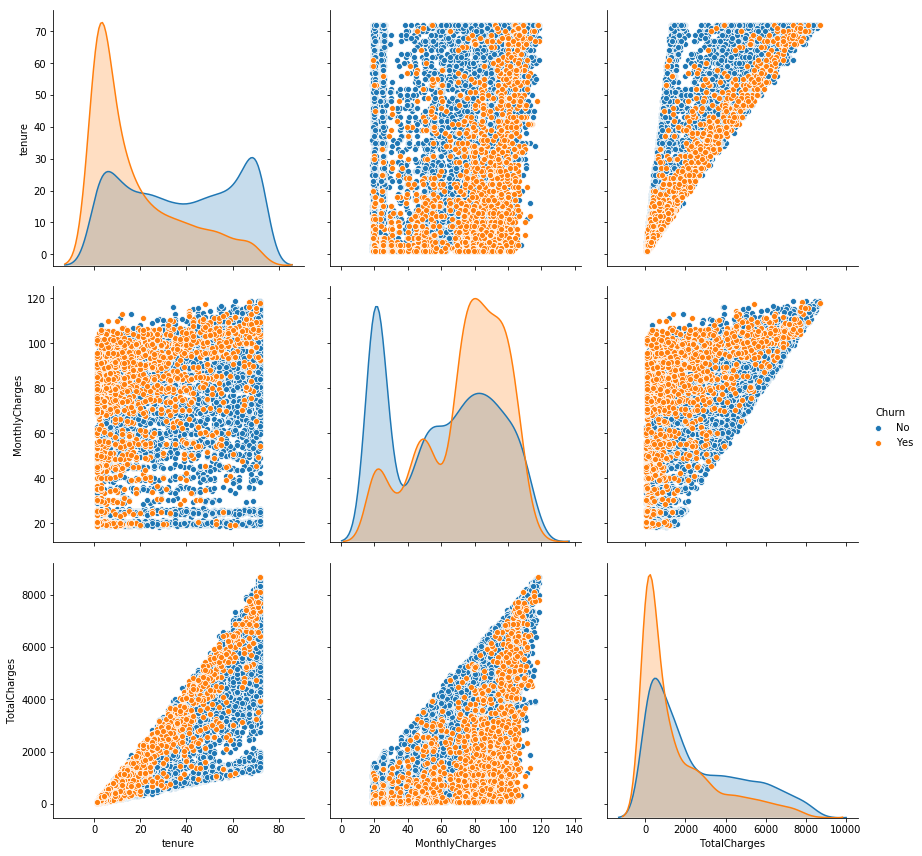

In [267]:
import seaborn as sns

sns.pairplot(Telco_df, hue="Churn", height= 4);

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


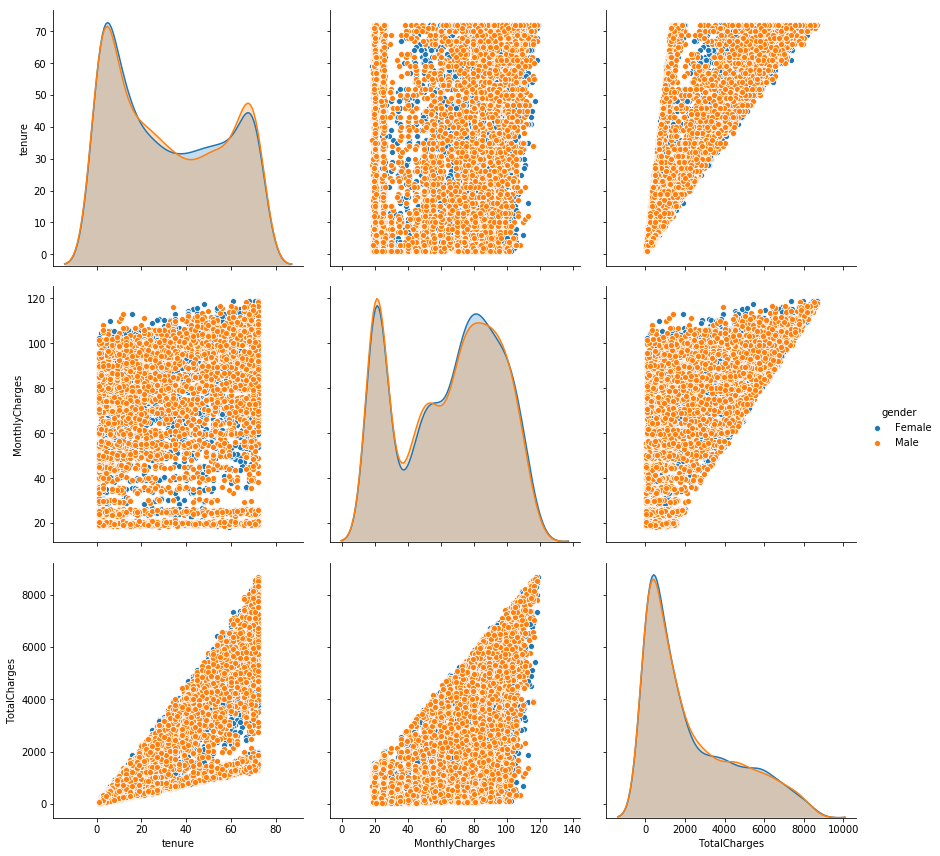

In [269]:
import seaborn as sns
sns.pairplot(Telco_df, hue="gender", height= 4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


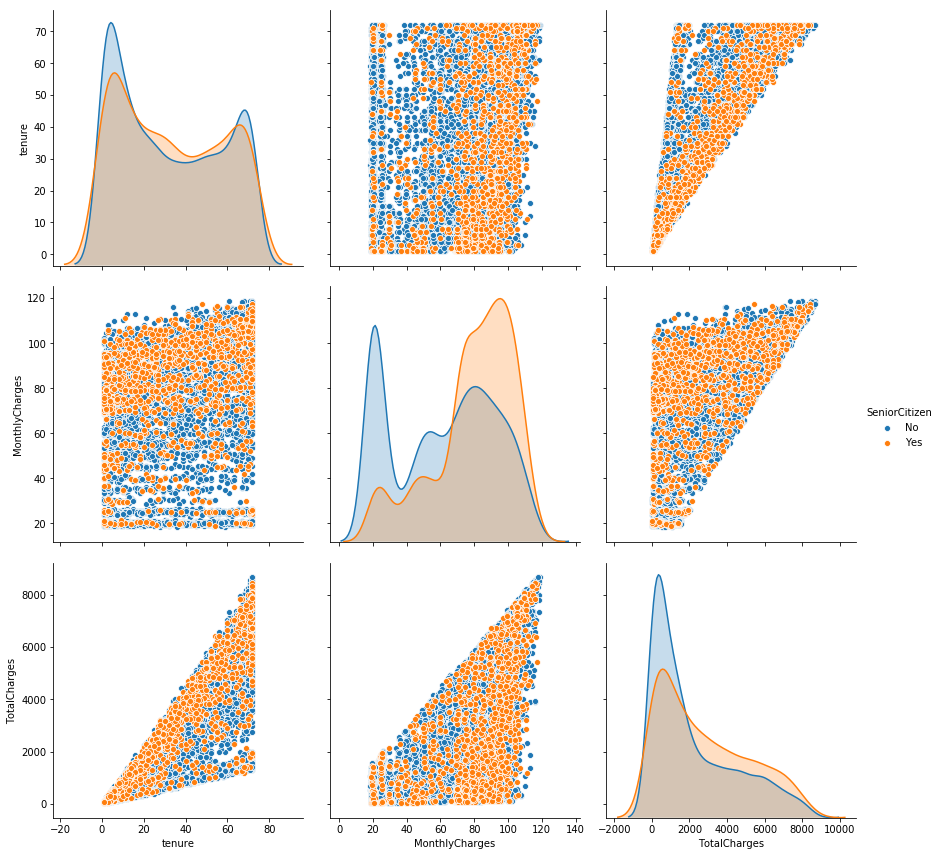

In [271]:
import seaborn as sns
sns.pairplot(Telco_df, hue="SeniorCitizen", height= 4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


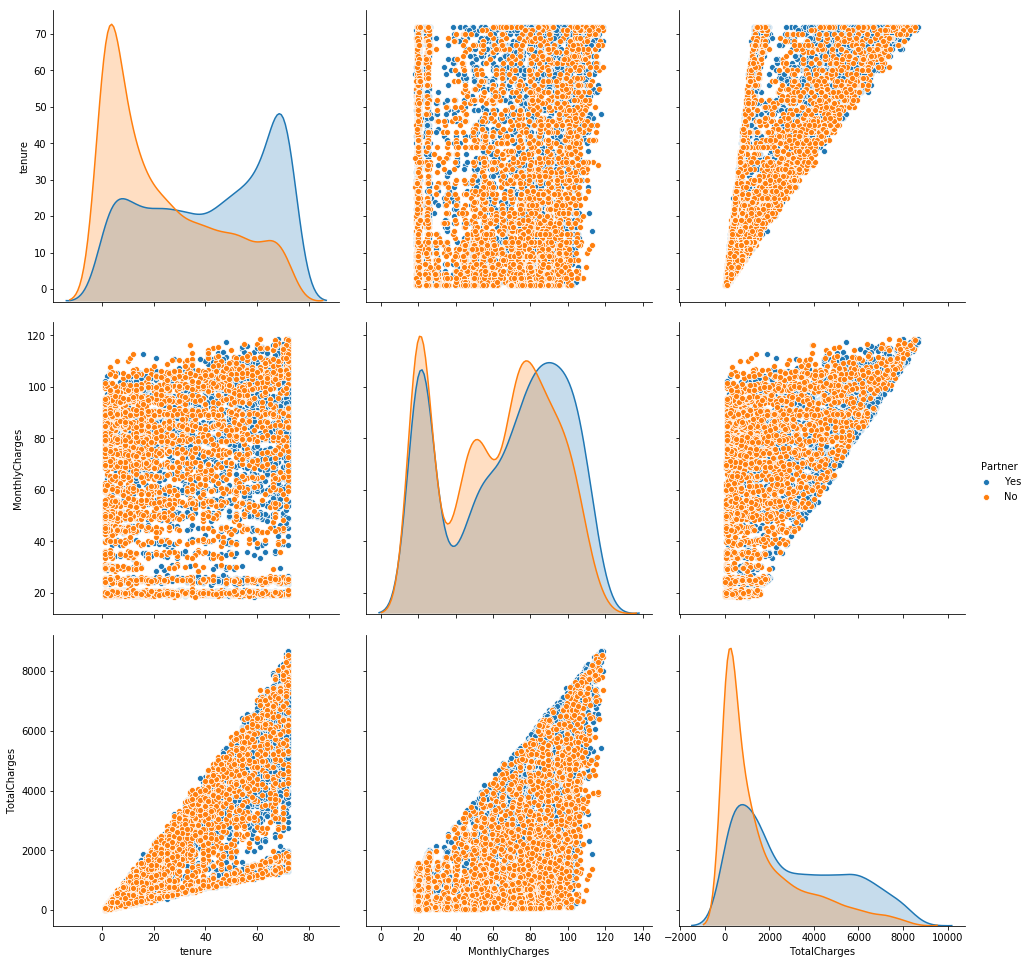

In [273]:
sns.pairplot(Telco_df, hue="Partner", height= 4.5)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


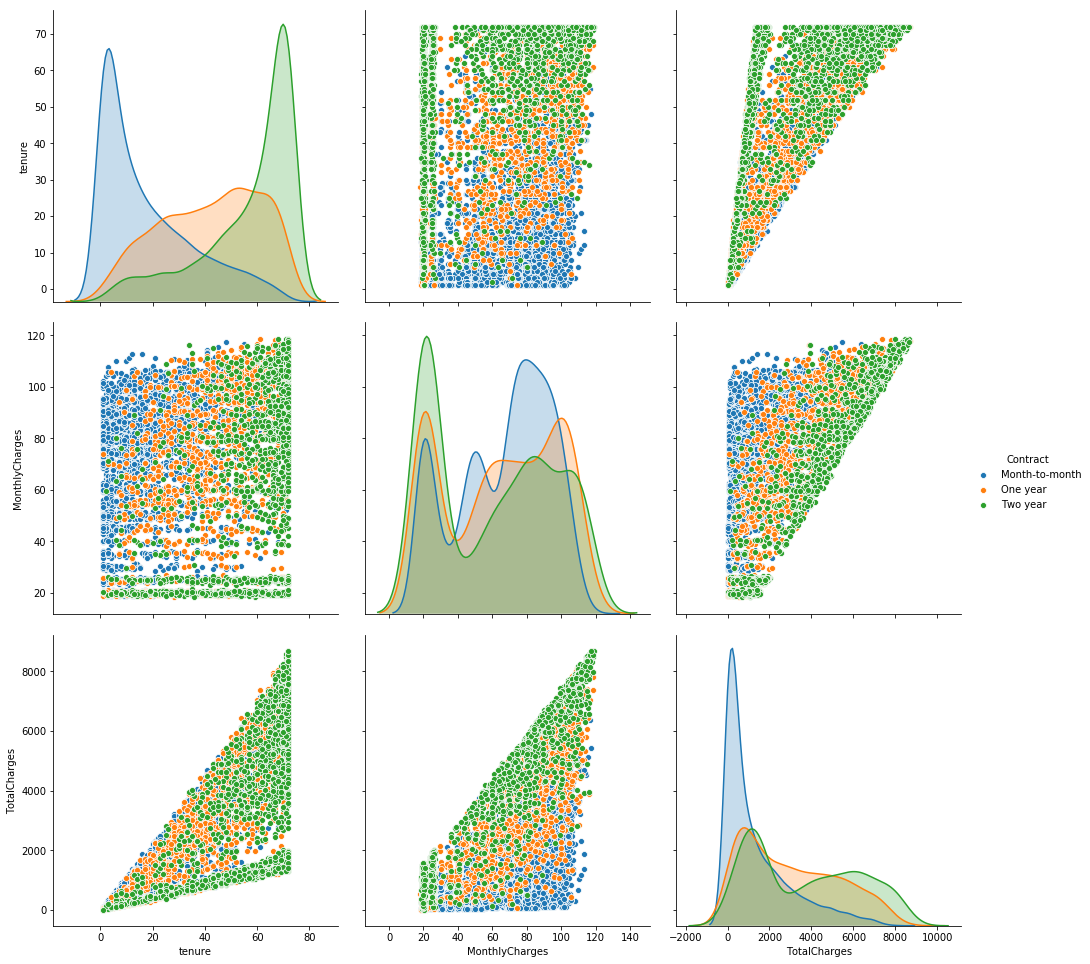

In [274]:
sns.pairplot(Telco_df, hue="Contract", height= 4.5)

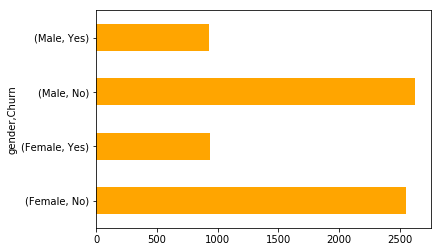

In [72]:
Telco_df.groupby('gender')['Churn'].value_counts().plot(kind = "barh", color = "orange")

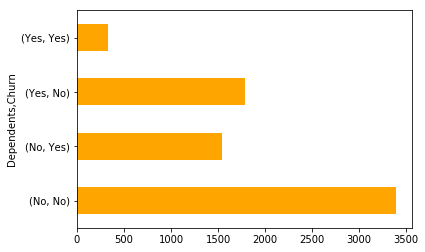

In [81]:
Telco_df.groupby('Dependents')['Churn'].value_counts().plot(kind = "barh", color = "orange")

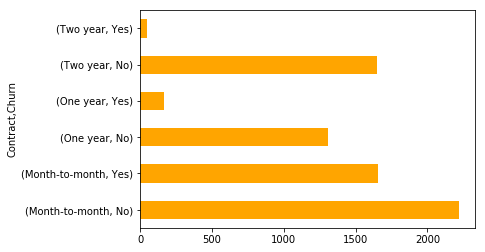

In [82]:
Telco_df.groupby('Contract')['Churn'].value_counts().plot(kind = "barh", color = "orange")

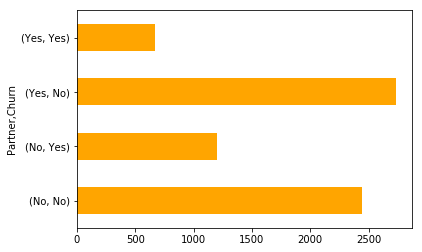

In [92]:
Telco_df.groupby('Partner')['Churn'].value_counts().plot(kind = "barh", color = "orange")


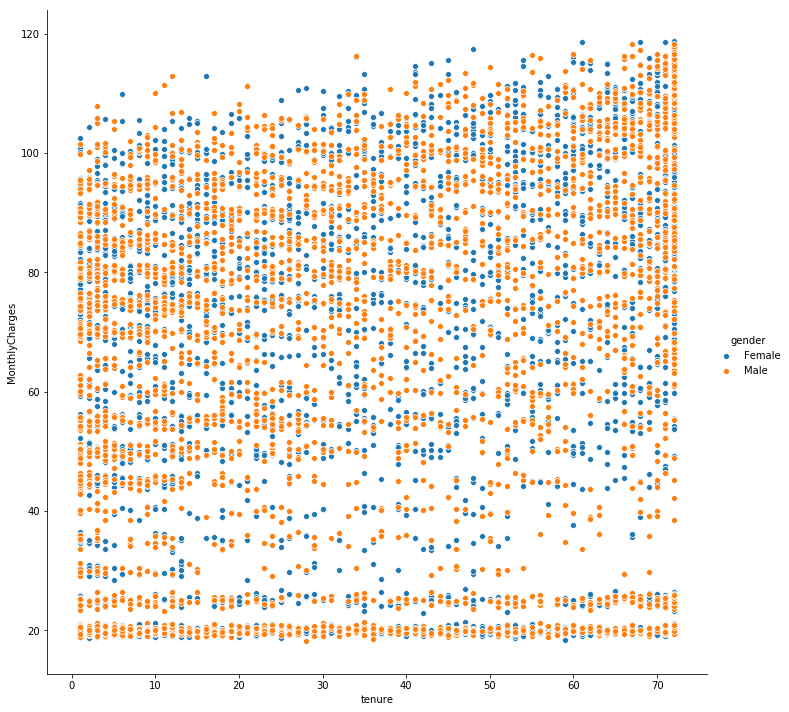

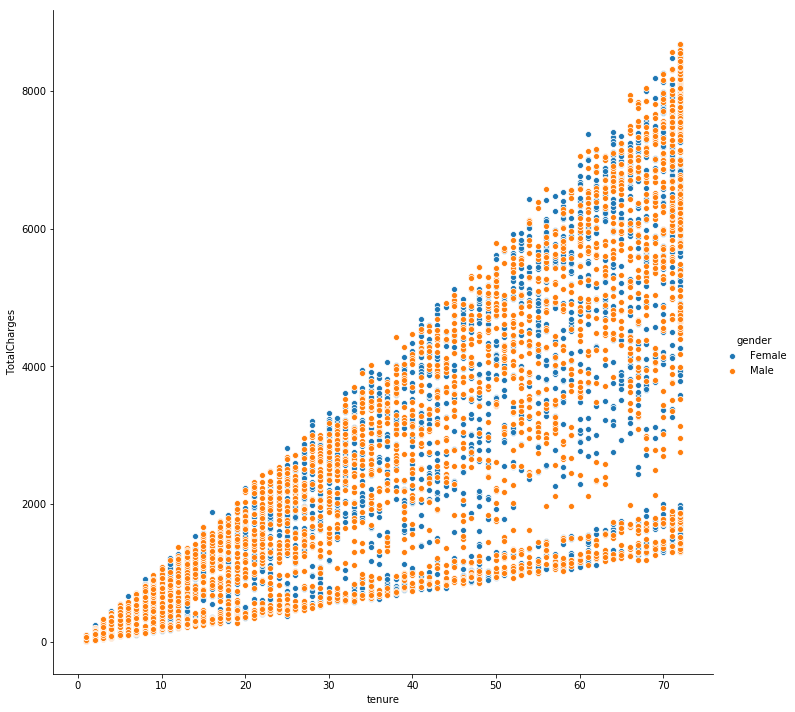

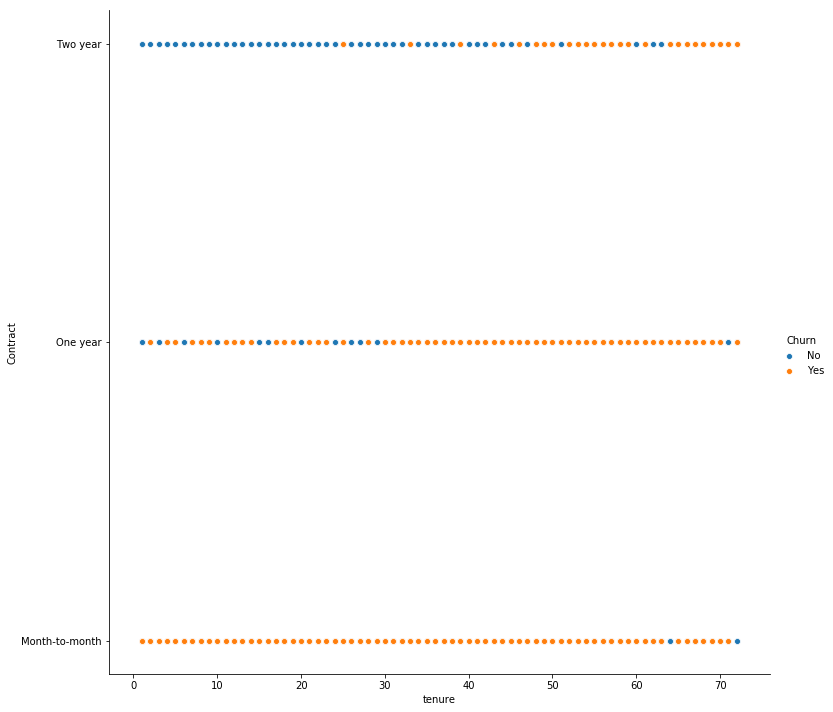

In [104]:
import seaborn as sns

sns.pairplot(x_vars=['tenure'], y_vars=['MonthlyCharges'], data=Telco_df, hue="gender", height=10)
sns.pairplot(x_vars=['tenure'], y_vars=['TotalCharges'], data=Telco_df, hue="gender", height=10)
sns.pairplot(x_vars=['tenure'], y_vars=['Contract'], data=Telco_df, hue="Churn", height=10)


In [130]:
Telco_df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


# More Feature Engineering

In [103]:
columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

for col in columns:
    tmp_df = pd.get_dummies(Telco_df[col], prefix=col)
    Telco_df = pd.concat((Telco_df, tmp_df), axis=1)

In [104]:
Telco_df = Telco_df.drop(columns = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])


In [105]:
Telco_df['gender'] = np.where((Telco_df.gender == 'Male'), 1, 0)
Telco_df['Dependents'] = np.where((Telco_df.Dependents == 'Yes'), 1, 0)
Telco_df['Partner'] = np.where((Telco_df.Partner == 'Yes'), 1, 0)
Telco_df['PaperlessBilling'] = np.where((Telco_df.PaperlessBilling == 'Yes'), 1, 0)
Telco_df['PhoneService'] = np.where((Telco_df.PhoneService == 'Yes'), 1, 0)


In [81]:
list(Telco_df)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentM

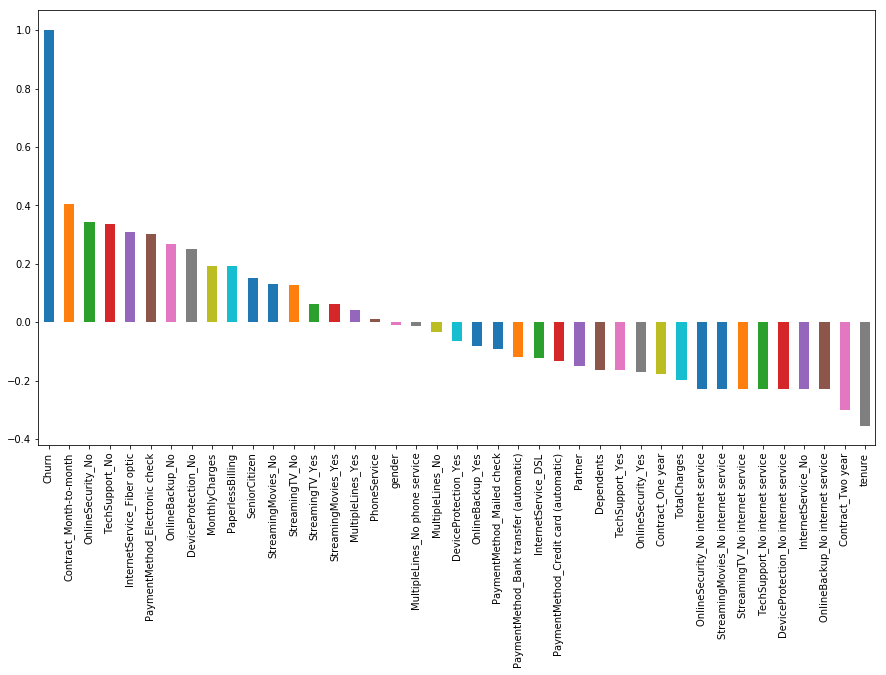

In [82]:
plt.figure(figsize=(15,8))
Telco_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')


In [83]:
# From the analysis, it seems like we need to remove the "_No blah" from the model and have it be part of the Bo.

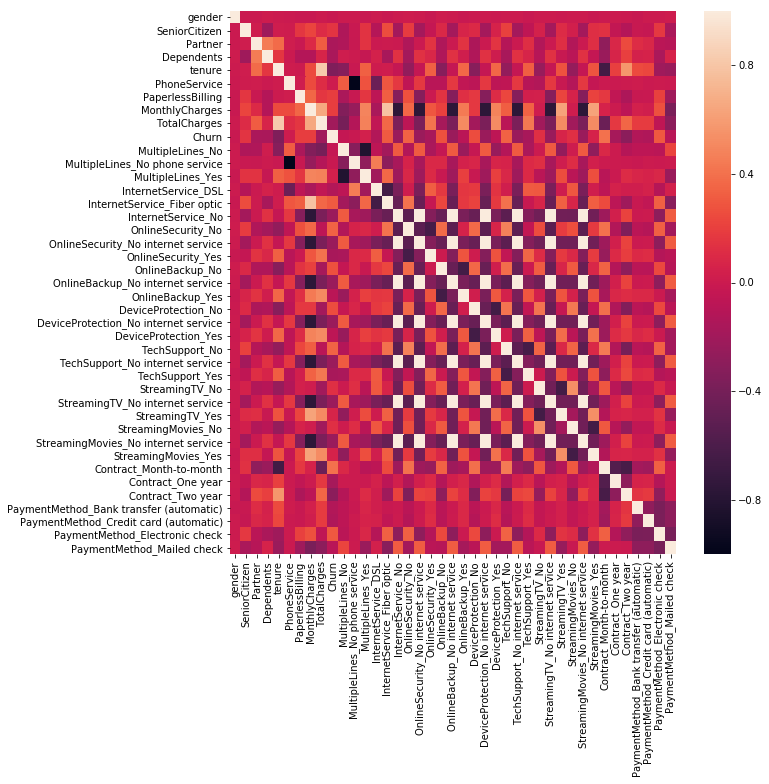

In [84]:
corr = Telco_df.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax = ax)

'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

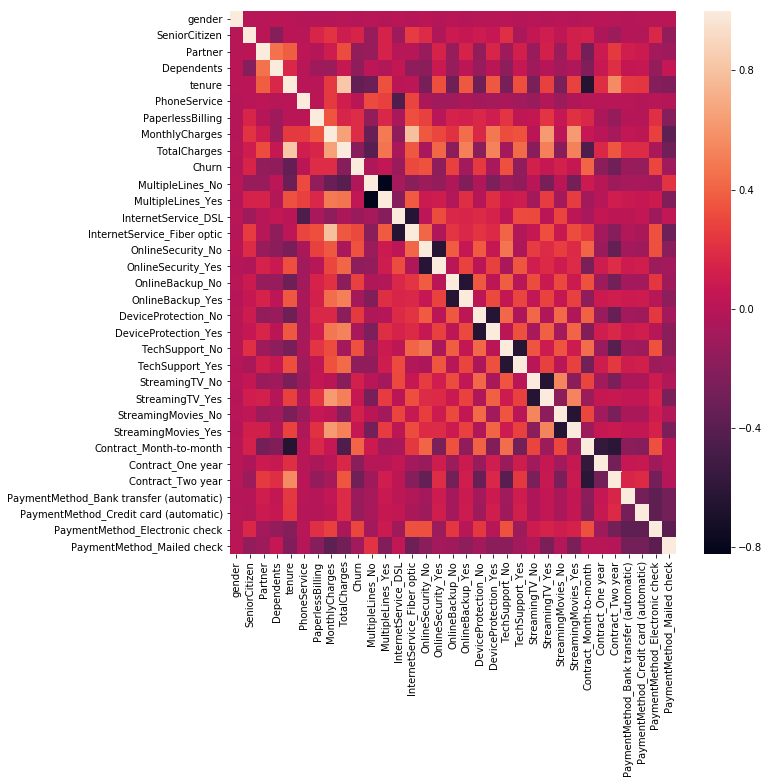

In [85]:
corr = Telco_df.drop(columns = ['MultipleLines_No phone service',
                                    'InternetService_No',
                                    'OnlineSecurity_No internet service',
                                    'OnlineBackup_No internet service',
                                    'DeviceProtection_No internet service',
                                    'TechSupport_No internet service',
                                    'StreamingTV_No internet service',
                                    'StreamingMovies_No internet service']).corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax = ax)

In [86]:
Telco_df.to_csv("Telco-Customer-Churn.csv")